# Convolutional neural network

In this section, we will extend the simple neural network framework to work with convolutional neural network (CNN).

In [1]:
import numpy as np
from timeit import default_timer as timer

%matplotlib inline

In [2]:
import nn
import neurons
from dataset import MNIST

train_data = MNIST('data/mnist/train-images-idx3-ubyte.gz', 'data/mnist/train-labels-idx1-ubyte.gz')
test_data = MNIST('data/mnist/t10k-images-idx3-ubyte.gz', 'data/mnist/t10k-labels-idx1-ubyte.gz')

In [3]:
num_examples = train_data.sample_size
num_inputs = np.prod(train_data.input_dim)
num_outputs = np.prod(train_data.target_dim)

In [4]:
scale_weight = .01

data_layer = nn.BatchDataLayer(train_data.inputs, train_data.targets, batch_size=64, shuffle=True)

conv_layer1 = nn.ConvolutionalLayer(
    filter_size=(3,3), stride=(1,1), pad=(1,1),
    num_filters=10, scale=scale_weight, neuron_type=neurons.ReLU)
pool_layer1 = nn.PoolingLayer(
    filter_size=(2,2), stride=(2,2), pad=(0,0))

conv_layer2 = nn.ConvolutionalLayer(
    filter_size=(5,5), stride=(1,1), pad=(2,2),
    num_filters=20, scale=scale_weight, neuron_type=neurons.ReLU)
pool_layer2 = nn.PoolingLayer(
    filter_size=(2,2), stride=(2,2), pad=(0,0))

fc_layer1 = nn.FullyConnectedLayer(
    num_neurons=256, scale=scale_weight, neuron_type=neurons.ReLU)
fc_layer2 = nn.FullyConnectedLayer(
    num_neurons=10, scale=scale_weight)

softmax_layer = nn.SoftmaxLayer()
loss_layer = nn.CrossEntropyLayer()

cnn_net = nn.NeuralNetwork(
    data_layer,
    [
     conv_layer1,
#      pool_layer1,
#      conv_layer2,
#      pool_layer2,
#      fc_layer1,
     fc_layer2,
     softmax_layer
    ],
    loss_layer)


In [5]:
epochs = 10
learning_rate = .002
num_batches = 100

for e in range(epochs):
    print("--- Epoch %d ---" % e)
    start = timer()
    loss = cnn_net.train(learning_rate, num_batches, verbose=False)
    end = timer()
    # print("param", softmax_layer.parameters())
    # print("grad", softmax_layer.gradient())
    print("loss %f (%.3f seconds elapsed)" % (loss, end - start))

--- Epoch 0 ---
loss 5448.808044 (8.025 seconds elapsed)
--- Epoch 1 ---
loss 2643.400392 (7.803 seconds elapsed)
--- Epoch 2 ---
loss 2341.007500 (8.314 seconds elapsed)
--- Epoch 3 ---
loss 2151.070379 (9.901 seconds elapsed)
--- Epoch 4 ---
loss 1999.917387 (9.567 seconds elapsed)
--- Epoch 5 ---
loss 1861.305097 (9.253 seconds elapsed)
--- Epoch 6 ---
loss 1720.857154 (10.023 seconds elapsed)
--- Epoch 7 ---
loss 1571.528902 (18.804 seconds elapsed)
--- Epoch 8 ---
loss 1413.818897 (12.738 seconds elapsed)
--- Epoch 9 ---
loss 1254.654428 (16.088 seconds elapsed)


In [6]:
def model_predict(net, inputs, labels):
    yhat = net.evaluate(inputs)
    pred_labels = np.argmax(yhat, axis=1)
    num_correct = np.sum(pred_labels == labels)
    return num_correct, pred_labels

In [7]:
num_correct, pred_labels = model_predict(cnn_net, test_data.inputs[:200], test_data.labels[:200])
print(num_correct / len(pred_labels))

0.94


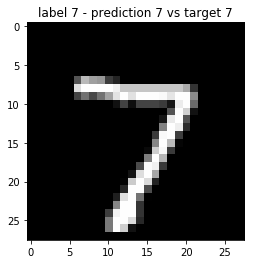

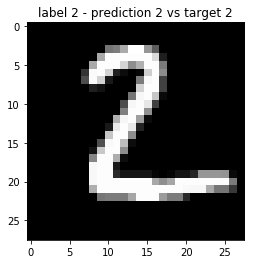

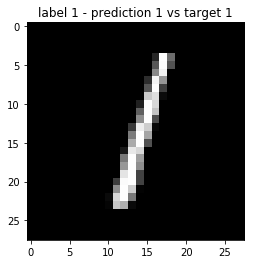

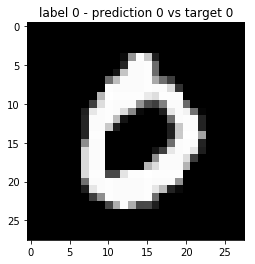

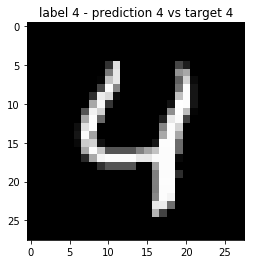

In [8]:
for i in range(5):
    num_correct, pred_labels = model_predict(cnn_net, test_data.inputs[np.newaxis, i], test_data.labels[np.newaxis, i])
    test_data.show_image(i, "prediction %d vs target %d" % (pred_labels[0], test_data.labels[i]))